We will import our usual things:

    

In [1]:
%matplotlib inline 
#makes sure ive  got inline plots,gotta not be next to %magic function

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans serif"
import numpy as np

#to deal w images 
import PIL.Image as Image 

In [5]:
im=Image.open("stitch_reworked.png")

In [6]:
im_data=np.array(im)
im_data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [7]:
im_data.shape


(483, 430, 4)

Let's use a cool numpy function to see how many RGB combos are there in our image:
i.e how many colors we have in our image  

In [9]:
np.unique(im_data.reshape(-1,im_data.shape[2]),axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [10]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [11]:
im.show()

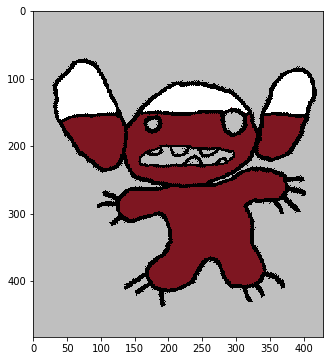

In [14]:
fig,ax = plt.subplots(figsize=(6,6))
#Plot gray underneath
ax.imshow(im_data*0.0+0.5) # bunch of RGBA = 0.5,0.5,0.5
ax.imshow(im_data)
plt.show()


In [15]:
im_data*0.0+0.5

array([[[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       ...,

       [[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       [[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]],

       [[0.5

Let's think about how we can filter our data:

Let's first pick out all the "good" pixels:


In [23]:
#for white: RGBA =  255,255,255,255
#MASK OUT just the good pixels

reds_good_mask=im_data[:,:,0] == 255
greens_good_mask=im_data[:,:,1] == 255
blues_good_mask=im_data[:,:,2] == 255
alpha_good_mask=im_data[:,:,3] == 255
reds_good_mask.shape
#im_data[reds_good_mask]

pixel_mask_good = reds_good_mask  & greens_good_mask & blues_good_mask & alpha_good_mask

In [24]:
good_pixels = im_data[pixel_mask_good]

In [25]:
ngood= len(good_pixels)
ngood

11929

replot our image w just these pixels showing:


In [26]:
im_data_masked_good = im_data.copy()  # numpy way of copying data
im_data_masked_good[~pixel_mask_good] = 0 
# This will make all ofthe "not good" pixels transparent (and black)

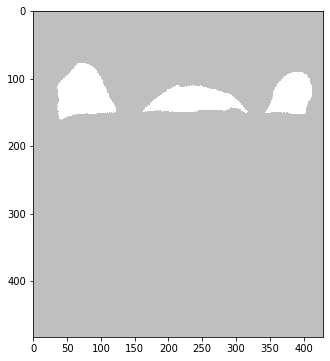

In [27]:
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(im_data*0.0+0.5 ) # our trick to make gray background
ax.imshow(im_data_masked_good)
plt.show()

In [28]:
reds_bad_mask=im_data[:,:,0] == 126
greens_bad_mask=im_data[:,:,1] == 22
blues_bad_mask=im_data[:,:,2] == 33
alpha_bad_mask=im_data[:,:,3] == 255 # 255= fully opaque (not transparent)
reds_bad_mask.shape
#im_data[reds_good_mask]

pixel_mask_bad = reds_bad_mask  & greens_bad_mask & blues_bad_mask & alpha_bad_mask

In [29]:
nbad=len(im_data[pixel_mask_bad])
nbad

40949

In [30]:
total_pixels= ngood+nbad 
badness = nbad/total_pixels
goodness = ngood/total_pixels
print("badness=",badness,"goodness",goodness)

badness= 0.774405234691176 goodness 0.22559476530882408


one way of plotting our new filtered and mutated  data is as a histogram


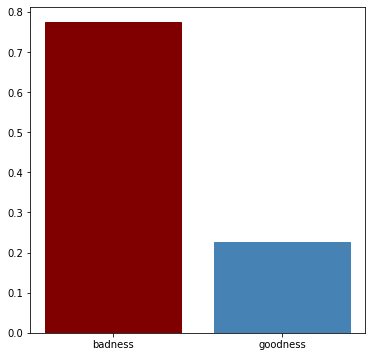

In [31]:
fig,ax = plt.subplots(figsize=(6,6))
labels= np.array(["badness","goodness"])
values = np.array([badness,goodness])
colors = np.array(['maroon','steelblue'])

myBarChart = ax.bar(labels,values)

# set colors of each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])

plt.show()

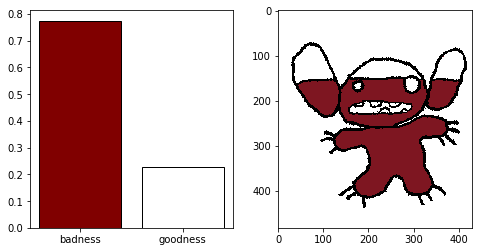

In [36]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
labels= np.array(["badness","goodness"])
values = np.array([badness,goodness])
colors = np.array(['maroon','white'])

myBarChart = ax[0].bar(labels,values) # now i have a *vector* of axes
ax[1].imshow(im_data)

# set colors of each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black')

plt.show()

Let;s make a histogram of all the colors. we have ti do a bit more preprocessing . BUT Its all stuff we have already done 

In [38]:
number_of_pixels_of_a_color = [] #num of pixels at a particular color
color_labels = [] #  how we label those colors on our histogram
color_values= [] # RGBA sequences 


In [39]:
unique_colors = np.unique(im_data.reshape(-1,im_data.shape[2]),axis=0)
unique_colors

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [48]:
for icolor,rgba in enumerate(unique_colors):
    #print(icolor,rgba)
    #we want to count pixels with whatever rgba combo
    
    #Step1: Mask out pixels at a particular color 
    reds_mask=im_data[:,:,0] == rgba[0]
    green_mask=im_data[:,:,1] == rgba[1]
    blues_mask=im_data[:,:,2] == rgba[2]
    alpha_mask=im_data[:,:,3] == rgba[3] 
    reds_bad_mask.shape
#im_data[reds_good_mask]

    pixel_mask = reds_mask  & green_mask & blues_mask & alpha_mask
    
    # sTEP 2: COUNT UP ALL PIXELS 
    npixels=len(im_data[pixel_mask])
    
    # store the number of pixels for this rgba combo
    number_of_pixels_of_a_color.append(npixels) #appending to a list obj
    
    #also want to name these colors
    color_labels.append("Color #"+str(icolor))
    
    #last thing:color values
    color_values.append(rgba/255) #this is converting to matplotlb bar 

In [50]:
color_labels


['color of0',
 'color of1',
 'color of2',
 'color of3',
 'Color #0',
 'Color #1',
 'Color #2',
 'Color #3',
 'Color #0',
 'Color #1',
 'Color #2',
 'Color #3']

In [43]:
color_values

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 1.]),
 array([0.49411765, 0.08627451, 0.12941176, 1.        ]),
 array([1., 1., 1., 1.])]

In [44]:
number_of_pixels_of_a_color


[135103, 19709, 40949, 11929]

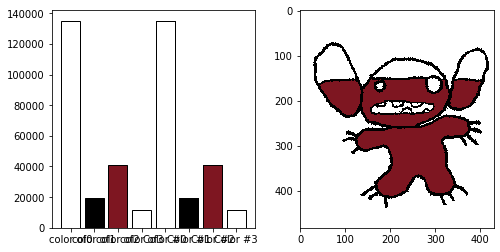

In [51]:
fig,ax = plt.subplots(1,2,figsize=(8,4))


myBarChart = ax[0].bar(color_labels,number_of_pixels_of_a_color) # now i have a *vector* of axes
ax[1].imshow(im_data)

# set colors of each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(color_values[i])
    myBarChart[i].set_edgecolor('black')

plt.show()

#STUFF W CSV 


In [52]:
import csv

open a file in usual way


In [53]:
f=open("/Users/patil/Downloads/building_inventory.csv")

In [54]:
f.seek(0) #start at top of file
for record in csv.reader(f):
    print(record)


['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '1975', '1975', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Anderson Lake Conservation Area - Fulton County', 'Anderson Lake C.a.', 'Astoria', '61501', 'Fulton', '17', 'Cheri Bustos', '93', 'Hammond Norine K.', '47', 'Jil Tracy', 'In Use', '2004', '2004', '144', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources'

['Department of Natural Resources', 'Lincoln Trail State Park - Clark County', 'Rr #1 Box 117', 'Marshall', '62441', 'Clark', '15', 'John Shimkus', '110', 'Phillips Reginald', '55', 'Dale A. Righter', 'In Use', '1958', '1958', '560', '1', '1', '0', 'Assembly', 'Assembly', 'Not provided']
['Department of Natural Resources', 'Johnson-Sauk Trail State Park - Henry County', '27500 N. 1200 Avenue', 'Kewanee', '61443', 'Henry', '17', 'Cheri Bustos', '74', 'Swanson Daniel', '37', 'Chuck Weaver', 'In Use', '1974', '1974', '50', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Johnson-Sauk Trail State Park - Henry County', '27500 N. 1200 Avenue', 'Kewanee', '61443', 'Henry', '17', 'Cheri Bustos', '74', 'Swanson Daniel', '37', 'Chuck Weaver', 'In Use', '1974', '1974', '50', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Johnson-Sauk Trail State Park - Henry County', '27500 N. 1200 Avenue', 'Kewanee', '61443', 'He

['Department of Natural Resources', 'Johnson-Sauk Trail State Park - Henry County', '27500 N. 1200 Avenue', 'Kewanee', '61443', 'Henry', '17', 'Cheri Bustos', '74', 'Swanson Daniel', '37', 'Chuck Weaver', 'In Use', '1993', '1993', '80', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Johnson-Sauk Trail State Park - Henry County', '27500 N. 1200 Avenue', 'Kewanee', '61443', 'Henry', '17', 'Cheri Bustos', '74', 'Swanson Daniel', '37', 'Chuck Weaver', 'In Use', '1993', '1993', '80', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Johnson-Sauk Trail State Park - Henry County', '27500 N. 1200 Avenue', 'Kewanee', '61443', 'Henry', '17', 'Cheri Bustos', '74', 'Swanson Daniel', '37', 'Chuck Weaver', 'In Use', '1993', '1993', '80', '1', '1', '0', 'Unusual', 'Unusual', 'Not provided']
['Department of Natural Resources', 'Johnson-Sauk Trail State Park - Henry County', '27500 N. 1200 Avenue', 'Kewanee', '61443', 'H

['Department of Corrections', 'Sheridan Correctional Center - LaSalle County', '4017 East 2603 Road', 'Sheridan', '60551', 'LaSalle', '16', 'Adam Kinzinger', '75', 'Welter David A.', '38', 'Sue Rezin', 'In Use', '1941', '1941', '100', '1', '1', '0', 'Industrial', 'Industrial', 'Not provided']
['Department of Corrections', 'Sheridan Correctional Center - LaSalle County', '4017 East 2603 Road', 'Sheridan', '60551', 'LaSalle', '16', 'Adam Kinzinger', '75', 'Welter David A.', '38', 'Sue Rezin', 'In Use', '1939', '1939', '3456', '2', '2', '0', 'Storage', 'Storage', 'Not provided']
['Department of Corrections', 'Sheridan Correctional Center - LaSalle County', '4017 East 2603 Road', 'Sheridan', '60551', 'LaSalle', '16', 'Adam Kinzinger', '75', 'Welter David A.', '38', 'Sue Rezin', 'In Use', '1950', '1950', '11362', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Corrections', 'Sheridan Correctional Center - LaSalle County', '4017 East 2603 Road', 'Sheridan', '60551', 'LaS

['Department of Transportation', 'Newton', 'South 1st Avenue', 'Newton', '62448', 'Jasper', '15', 'John Shimkus', '109', 'Reis David B.', '55', 'Dale A. Righter', 'In Use', '1976', '1976', '3840', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Transportation', 'Newton', 'South 1st Avenue', 'Newton', '62448', 'Jasper', '15', 'John Shimkus', '109', 'Reis David B.', '55', 'Dale A. Righter', 'In Use', '1997', '1997', '4032', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Transportation', 'Newton', 'South 1st Avenue', 'Newton', '62448', 'Jasper', '15', 'John Shimkus', '109', 'Reis David B.', '55', 'Dale A. Righter', 'In Use', '1976', '1976', '2400', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Department of Transportation', 'Enfield Maintenance Storage Facility', 'Rr #1, Box 10a', 'Enfield', '62835', 'White', '15', 'John Shimkus', '109', 'Reis David B.', '55', 'Dale A. Righter', 'In Use', '1978', '1978', '8720', '1', '1', '0', 'Industria

['Southern Illinois University', 'Southern Illinois University - Carbondale', '1206 Touch Of Nature Road', 'Makanda', '62958', 'Jackson', '12', 'Mike Bost', '115', 'Bryant Terri', '58', 'Paul Schimpf', 'In Use', '1954', '1954', '780', '1', '1', '0', 'Residential', 'Residential', 'Not provided']
['Southern Illinois University', 'Southern Illinois University - Carbondale', '1206 Touch Of Nature Road', 'Makanda', '62958', 'Jackson', '12', 'Mike Bost', '115', 'Bryant Terri', '58', 'Paul Schimpf', 'In Use', '1954', '1954', '1248', '1', '1', '0', 'Assembly', 'Assembly', 'Not provided']
['Southern Illinois University', 'Southern Illinois University - Carbondale', '1206 Touch Of Nature Road', 'Makanda', '62958', 'Jackson', '12', 'Mike Bost', '115', 'Bryant Terri', '58', 'Paul Schimpf', 'In Use', '1954', '1954', '40', '1', '1', '0', 'Storage', 'Storage', 'Not provided']
['Southern Illinois University', 'Southern Illinois University - Carbondale', '1206 Touch Of Nature Road', 'Makanda', '62958',

lets transform this data into something more user friendly

Firs,going to create a buncg if headers for each column in my dataset

In [56]:
f.seek(0) #start at top of file
reader= csv.reader(f) #reader object
header = next(reader)



In [57]:
data={} #dictonar to store my data 
for column in header:
    data[column] = []
data['myKey'] = 5
#data

## Pandas - for the better or the worst!


In [58]:
import pandas as pd

In [59]:
buildings= pd.read_csv("/Users/patil/Downloads/building_inventory.csv")

In [60]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


In [61]:
buildings.index # this will show how many enteries as an iterable

RangeIndex(start=0, stop=8862, step=1)

In [62]:
buildings.iloc[2000:2010]

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
2000,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1996,1996,140,1,1,0,Unusual,Unusual,Not provided
2001,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1963,1963,805,1,1,0,Storage,Storage,Not provided
2002,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1985,1985,1115,1,1,0,Storage,Storage,Not provided
2003,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1985,1985,128,1,1,0,Storage,Storage,Not provided
2004,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1979,1979,60,1,1,0,Storage,Storage,Not provided
2005,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1978,1978,288,1,1,0,Storage,Storage,Not provided
2006,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1979,1979,60,1,1,0,Unusual,Unusual,Not provided
2007,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1979,1979,20,1,1,0,Unusual,Unusual,Not provided
2008,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1982,1982,42,1,1,0,Unusual,Unusual,Not provided
2009,Department of Natural Resources,Moraine View State Park - McLean County,"R.r. #2, Box 110",Leroy,61752,McLean,18,Darin M. LaHood,101,Mitchell Bill,...,In Use,1982,1982,42,1,1,0,Unusual,Unusual,Not provided


In [63]:
buildings.iloc[2000:2010]["Agency Name"] # pulling out entries by # and field 

2000    Department of Natural Resources
2001    Department of Natural Resources
2002    Department of Natural Resources
2003    Department of Natural Resources
2004    Department of Natural Resources
2005    Department of Natural Resources
2006    Department of Natural Resources
2007    Department of Natural Resources
2008    Department of Natural Resources
2009    Department of Natural Resources
Name: Agency Name, dtype: object

In [64]:
buildings['Bldg Status'].unique()

array(['In Use', 'Abandon', 'In Progress'], dtype=object)

In [65]:
#summary info 
buildings.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


Pandas can also do simple plots:


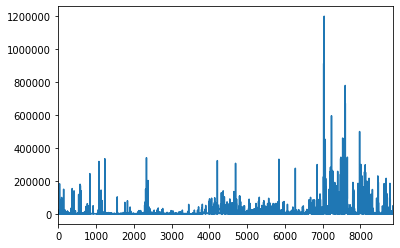

In [66]:
buildings["Square Footage"].plot()

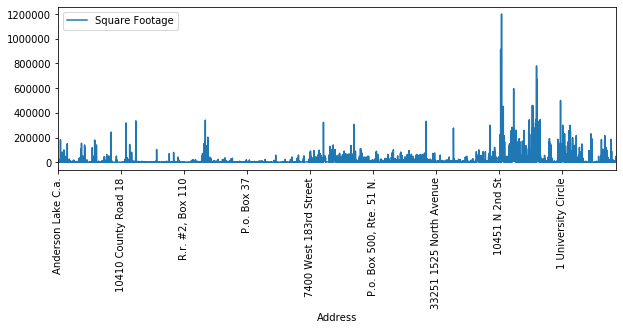

In [67]:
buildings.plot(x="Address", y = "Square Footage" , figsize=(10,3),rot=90)

Pull out my axes objects and use them like matplotlib objects:

(1750, 2010)

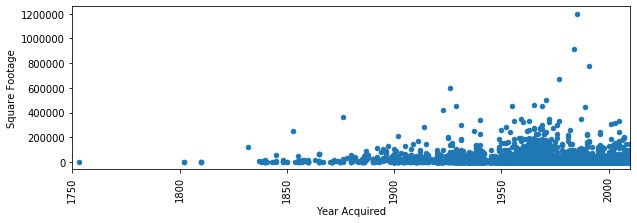

In [72]:
ax= buildings.plot(x="Year Acquired",y = "Square Footage",figsize=(10,3), rot=90 , kind="scatter" )
# can use axes object like any matplotlib one 

ax.set_xlim(1750,2010)

We will use one of pandas neat tool---  group by:

In [74]:
buildings.groupby("Year Acquired")["Square Footage"].sum()

Year Acquired
0       1106855
1753       1200
1802       4440
1810       4033
1832     120000
         ...   
2015     305093
2016     304839
2017       6720
2018      17160
2019       1520
Name: Square Footage, Length: 172, dtype: int64

NameError: name 'hey' is not defined